In [5]:
import matplotlib.pyplot as plt
import numpy  # numpy is used to make some operrations with arrays more easily
import pandas as pd
import numpy as np

In [6]:
# Importing the dataset
dataset = pd.read_csv('../HousingData.csv')

In [7]:
list(dataset.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

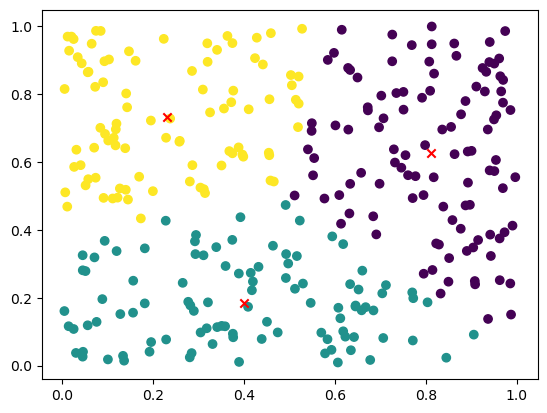

In [8]:

class KMeansClustering:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_iterations=100):
        y = np.zeros(X.shape[0], dtype=int)  # Initialize labels
        self.centroids = np.random.uniform(
            np.amin(X, axis=0), np.amax(X, axis=0), (self.k, X.shape[1])
        )

        for _ in range(max_iterations):
            prev_centroids = np.copy(self.centroids)
            y = []

            for data_point in X:
                distances = KMeansClustering.distance(data_point, self.centroids)
                cluster_number = np.argmin(distances)
                y.append(cluster_number)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])

                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])

            self.centroids = np.array(cluster_centers)

            if np.max(np.abs(prev_centroids - self.centroids)) < 0.0001:
                break
        
        return y

# Generate random data
np.random.seed(42)
random_points = np.random.rand(300, 2)

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c="red", marker="x")

plt.show()
